Importing Required Packages

In [1]:
import pandas_datareader.data as reader
import datetime as dt
import numpy as np
import scipy.stats
import scipy.optimize as sc
import pandas as pd
import random
import matplotlib.pyplot as plt

User Input

In [2]:
print('Input the number of Stock Tickers')
n=int(input())
stocktickers=[]
for i in range(0,n):
    print('Stock Ticker')
    s=input()
    s=s.upper()
    stocktickers.append(s)

    

Input the number of Stock Tickers
3
Stock Ticker
aapl
Stock Ticker
msft
Stock Ticker
tsla


Getting the Stock Data

In [3]:
end=dt.datetime.now()
start=dt.datetime(end.year-4,end.month,end.day)
df=reader.get_data_yahoo(stocktickers,start,end)['Adj Close']
returns=df.pct_change()
returns=returns.dropna()

<AxesSubplot:xlabel='Date'>

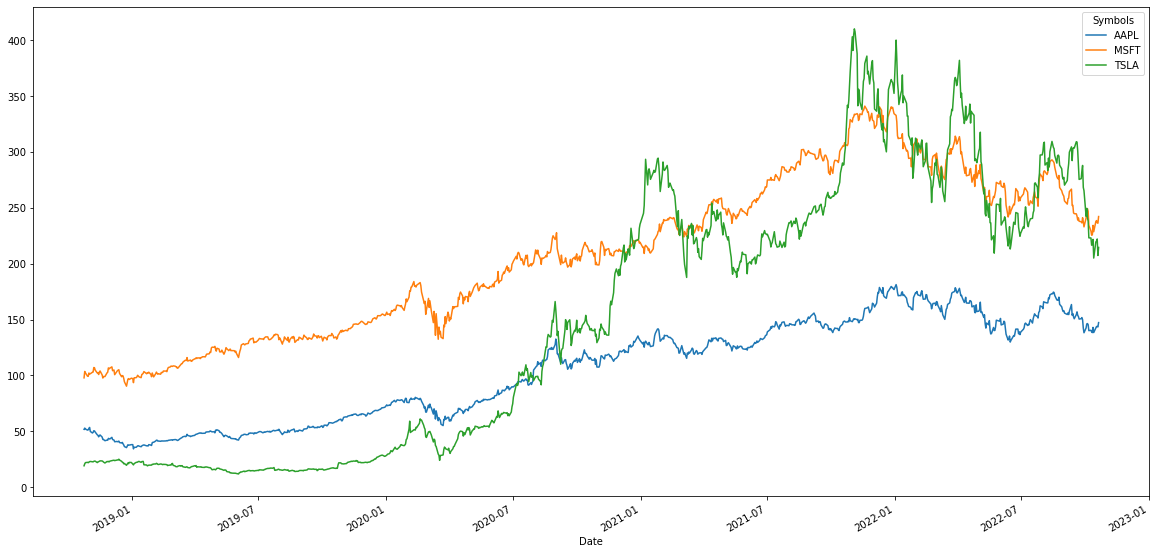

In [4]:
df.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

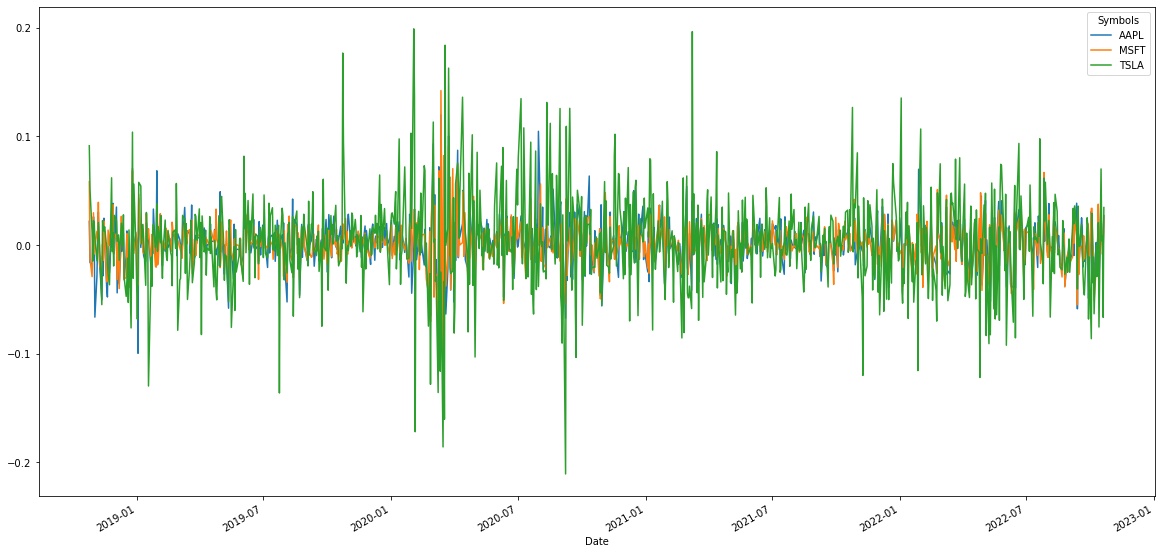

In [5]:
returns.plot(figsize=(20,10))

Expected Returns

In [6]:
d=len(returns)
expret=returns.mean()


Covariance Matrix

In [7]:
covm=returns.cov()
covm

Symbols,AAPL,MSFT,TSLA
Symbols,,,
AAPL,0.000477,0.000340,0.000450
MSFT,0.000340,0.000396,0.000408
TSLA,0.000450,0.000408,0.001753


Efficient Portfolio Calculation

In [8]:
wt=np.linspace(-1,1,10000)
wt = [ round(elem, 3) for elem in wt ]
wp=[]
for i in range(0,10000000):
    t=[]
    p=n-1
    t.append(wt[random.randrange(0,10000)])
    while(p>0):
        t.append(wt[random.randrange(0,10000)])
        p=p-1
    if sum(t)==1:
        wp.append(t)



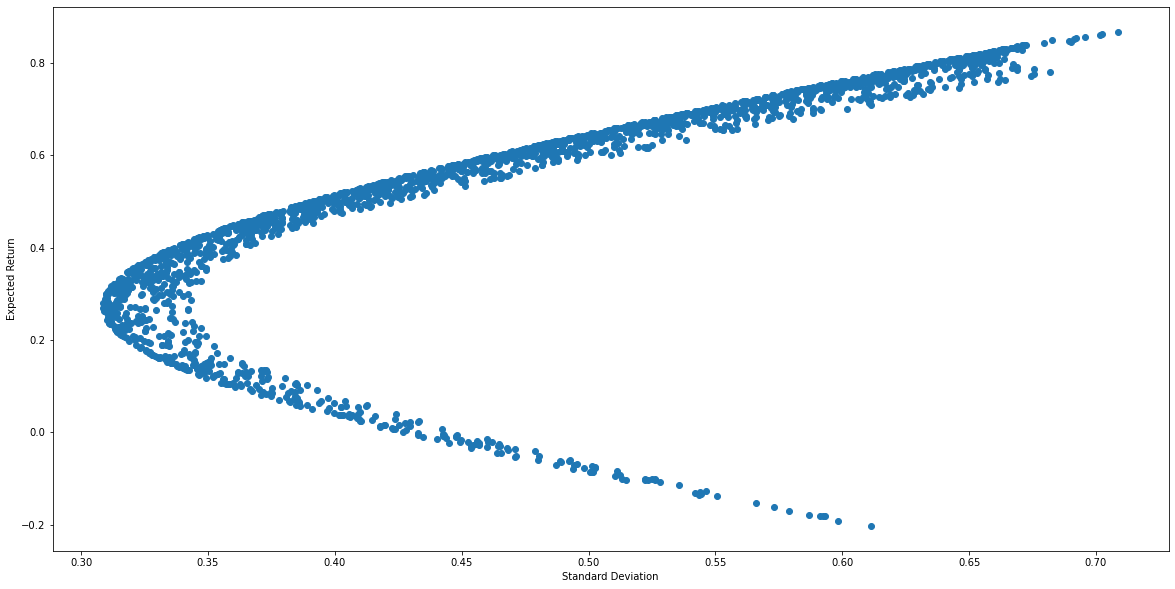

In [9]:
retsh=[]
stdsh=[]
shar=[]
for i in range(0,len(wp)):
    w=wp[i]
    retr=np.sum(w*expret)*252
    std=np.sqrt(np.dot(np.transpose(w),np.dot(covm,w)))*np.sqrt(252)
    riskf=0.04
    sharpe=(retr-riskf)/std
    retsh.append(retr)
    stdsh.append(std)
    shar.append(sharpe)
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(stdsh,retsh)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
maxs=shar[0]
pos=0
for i in range(0,len(shar)):
    if shar[i]>maxs:
        maxs=shar[i]
        pos=i


In [14]:
print('\033[1mAsset Allocation\033[0m')
for i in range(0,n):
    print('%s = %f'%(stocktickers[i],wp[pos][i]))
print('Sharpe Ratio for the Portfolio is %f'%shar[pos])

Asset Allocation
AAPL = 0.316000
MSFT = 0.052000
TSLA = 0.632000
Sharpe Ratio for the Portfolio is 1.211916
